In [1]:
# %load_ext lab_black

In [2]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# read in data
df = pd.read_csv("train.csv")

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#rename headers

df = df.rename(columns = {
    "PassengerId": "passenger_id",
    "Survived": "survived",
    "Pclass": "ticket_class",
    "Name": "name",
    "Sex": "sex",
    "Age": "age",
    "SibSp": "siblings_spouses",
    "Parch": "parents_children",
    "Ticket": "ticket_num",
    "Fare": "fare",
    "Cabin": "cabin",
    "Embarked": "embarked_port"
})

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#count NaNs

df.isna().sum()

passenger_id          0
survived              0
ticket_class          0
name                  0
sex                   0
age                 177
siblings_spouses      0
parents_children      0
ticket_num            0
fare                  0
cabin               687
embarked_port         2
dtype: int64

In [8]:
# Fill cabin NaNs randomly

df['cabin'] = df['cabin'].fillna(method = 'ffill')

df['cabin'] = df['cabin'].fillna('D85', limit = 1)

In [9]:
df['cabin'] = df['cabin'].str[:1]

In [10]:
df['cabin']

0      D
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    B
889    C
890    C
Name: cabin, Length: 891, dtype: object

In [11]:
# Replace NaNs in age with average

# df['age'].mean()

df['age'] = df['age'].fillna(29.7)

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,D,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


In [12]:
# Fill in embarked port NaNs randomly

df['embarked_port'] = df['embarked_port'].fillna(method = 'ffill')

In [13]:
#count NaNs

df.isna().sum()

passenger_id        0
survived            0
ticket_class        0
name                0
sex                 0
age                 0
siblings_spouses    0
parents_children    0
ticket_num          0
fare                0
cabin               0
embarked_port       0
dtype: int64

In [14]:
#check outputs 
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

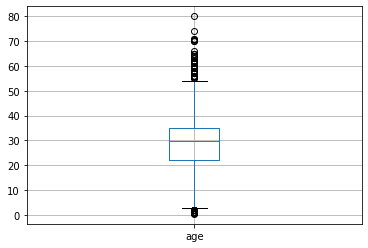

In [15]:
df.boxplot(column = 'age')

In [16]:
# create bins for age

df['age_bucket'] = pd.qcut(df['age'], 5)

In [17]:
df['age_bucket'].value_counts()

(28.0, 29.7]     199
(20.0, 28.0]     183
(0.419, 20.0]    179
(38.0, 80.0]     177
(29.7, 38.0]     153
Name: age_bucket, dtype: int64

In [18]:
# Create plots showing difference in survival rates by age

# ax = df.plot.bar(x='age_bucket', y='survived', rot=0)

# if survived == 0:
#     df.hist(bins=3)


In [19]:
df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port,age_bucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,D,S,"(20.0, 28.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(29.7, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,"(20.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(29.7, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,"(29.7, 38.0]"


In [20]:
# Drop unused columns
df = df.drop(['passenger_id', 'name', 'age_bucket', 'ticket_num'], axis = 1)
# df = df.drop(['passenger_id'], axis = 1)
# df = df.drop(['name'], axis = 1)
# df = df.drop(['age_bucket'], axis = 1)

In [21]:
# Reconfigure ticket_class 
df = df.assign(ticket_class=lambda df: df["ticket_class"].replace({1: "First", 2: "Second", 3: "Third"}))

In [22]:
# Set target

target = df["survived"]

y = target
X = df.drop(['survived'], axis=1)

In [23]:
X.columns

Index(['ticket_class', 'sex', 'age', 'siblings_spouses', 'parents_children',
       'fare', 'cabin', 'embarked_port'],
      dtype='object')

In [24]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [25]:
X.columns

Index(['ticket_class', 'sex', 'age', 'siblings_spouses', 'parents_children',
       'fare', 'cabin', 'embarked_port'],
      dtype='object')

In [26]:
cf = ColumnTransformer(
    [
        ("numerical", "passthrough", ["fare", "age", "siblings_spouses", "parents_children"],),
        ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin", "embarked_port"]),
    ]
)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [28]:
# Dummy Classifier

d_pipeline = make_pipeline(cf, DummyClassifier())
d_pipeline.fit(X_train, y_train)
y_test_pred_dc = d_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dc))

              precision    recall  f1-score   support

           0       0.59      0.56      0.58       137
           1       0.35      0.38      0.37        86

    accuracy                           0.49       223
   macro avg       0.47      0.47      0.47       223
weighted avg       0.50      0.49      0.50       223



C:\Users\bates\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [29]:
# accuracy score for Dummy Classifier

accuracy_score(y_test, y_test_pred_dc)

0.49327354260089684

In [30]:
# Logistic Regression Model

lr_pipeline = make_pipeline(cf, LogisticRegression(max_iter=1000))
lr_pipeline.fit(X_train, y_train)
y_test_pred_lr = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
           1       0.77      0.70      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [31]:
# accuracy score for Logistic Regression Model

accuracy_score(y_test, y_test_pred_lr)

0.8026905829596412

In [32]:
# Decision Tree Model (unpruned)

dt_pipeline = make_pipeline(cf, DecisionTreeClassifier())
dt_pipeline.fit(X_train, y_train)
y_test_pred_dt = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       137
           1       0.68      0.66      0.67        86

    accuracy                           0.75       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.75      0.75      0.75       223



In [33]:
# accuracy score for decision tree model (unpruned)

accuracy_score(y_test, y_test_pred_dt)

0.7488789237668162

In [34]:
# Random Forest Model

rf_pipeline = make_pipeline(cf, RandomForestClassifier(n_estimators=10000))
rf_pipeline.fit(X_train, y_train)
y_test_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       137
           1       0.79      0.62      0.69        86

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223



In [35]:
# accuracy score for random forest model (unpruned)

accuracy_score(y_test, y_test_pred_rf)

0.7892376681614349